In [53]:
import dask
from dask.distributed import Client, LocalCluster
import xarray as xr
import numpy as np
import  matplotlib.pyplot as plt
import os
from ipywidgets import Image
from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox
from ipycanvas import  hold_canvas,  MultiCanvas #RoughCanvas,Canvas,
import imageio

In [2]:
cluster = LocalCluster() 
client = Client(cluster)
print('Dashboard at '+cluster.dashboard_link)

2022-08-24 14:25:01,074 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-b7kqchus', purging
2022-08-24 14:25:01,076 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-lzh8wh_7', purging
2022-08-24 14:25:01,076 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-95fhg9mh', purging
2022-08-24 14:25:01,077 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-y2_mycrp', purging
2022-08-24 14:25:01,077 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-v2dsga8k', purging
2022-08-24 14:25:01,078 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-rfiqopwv', purging
2022-08-24 14:25:01,078 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-dqtzp9pw', purging

Dashboard at http://127.0.0.1:8787/status


In [3]:
from filter_functions import image_filter

In [4]:
import training_functions as tfs
from training_functions import train_segmentation


In [5]:
def on_mouse_down(x, y):
    global drawing
    global position
    global shape
    drawing = True
    position = (x, y)
    shape = [position]

def on_mouse_move(x, y):
    global drawing
    global position
    global shape
    if not drawing:
        return
    with hold_canvas():
        canvas.stroke_line(position[0], position[1], x, y)
        position = (x, y)
    shape.append(position)

def on_mouse_up(x, y):
    global drawing
    global positiondu
    global shape
    drawing = False
    with hold_canvas():
        canvas.stroke_line(position[0], position[1], x, y)
        canvas.fill_polygon(shape)
    shape = []

In [6]:
path = '/home/fische_r/NAS/testing/Jeremy_tomo/tomodata.nc'
featpath = '/home/fische_r/NAS/testing/Jeremy_tomo/featdata.nc'
# path = r"C:\Zwischenlager\tomodata.nc"
path = '/mpc/homes/fische_r/wood3/wood_tomo.nc'
featpath = '/mpc/homes/fische_r/wood3/featdata.nc'

In [7]:
IF = image_filter(data_path=path, outpath = featpath)

In [8]:
IF.open_raw_data()

In [9]:
IF.data = IF.data[30:-20,15:-50,:100,:50]

In [10]:
IF.data

dask.array<getitem, shape=(250, 185, 100, 50), dtype=uint16, chunksize=(50, 50, 50, 40), chunktype=numpy.ndarray>

In [11]:
IF.prepare()

In [12]:
IF.stack_features()

In [13]:
IF.feature_stack

dask.array<stack, shape=(250, 185, 100, 50, 73), dtype=float64, chunksize=(50, 50, 50, 33, 1), chunktype=numpy.ndarray>

In [14]:
IF.compute() #not sure what is more efficient, but I would compute the features and even store them on disk
# had the impression that otherwise many redundant operations happen

2022-08-24 14:43:35,660 - distributed.spill - ERROR - Spill to disk failed; keeping data in memory
Traceback (most recent call last):
  File "/mpc/homes/fische_r/miniconda3/lib/python3.9/site-packages/distributed/spill.py", line 114, in handle_errors
    yield
  File "/mpc/homes/fische_r/miniconda3/lib/python3.9/site-packages/distributed/spill.py", line 210, in evict
    _, _, weight = self.fast.evict()
  File "/mpc/homes/fische_r/miniconda3/lib/python3.9/site-packages/zict/lru.py", line 125, in evict
    cb(k, v)
  File "/mpc/homes/fische_r/miniconda3/lib/python3.9/site-packages/zict/buffer.py", line 81, in fast_to_slow
    self.slow[key] = value
  File "/mpc/homes/fische_r/miniconda3/lib/python3.9/site-packages/zict/cache.py", line 65, in __setitem__
    self.data[key] = value
  File "/mpc/homes/fische_r/miniconda3/lib/python3.9/site-packages/distributed/spill.py", line 311, in __setitem__
    self.d[key] = pickled
  File "/mpc/homes/fische_r/miniconda3/lib/python3.9/site-packages/zi

In [15]:
# IF.make_xarray_nc()

In [16]:
IF.make_xarray_nc()

In [17]:
IF.result['feature_stack']

<xarray.DataArray 'feature_stack' (x: 250, y: 185, z: 100, time: 50, feature: 73)>
dask.array<stack, shape=(250, 185, 100, 50, 73), dtype=float64, chunksize=(50, 50, 50, 33, 1), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 241 242 243 244 245 246 247 248 249
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 176 177 178 179 180 181 182 183 184
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * feature  (feature) <U32 'original' ... 'median_dynamic_4.0'

In [ ]:
# IF.result.to_netcdf(featpath)

Task exception was never retrieved
future: <Task finished name='Task-595992' coro=<Client._gather.<locals>.wait() done, defined at /home/fische_r/miniconda3/lib/python3.9/site-packages/distributed/client.py:2003> exception=AllExit()>
Traceback (most recent call last):
  File "/home/fische_r/miniconda3/lib/python3.9/site-packages/distributed/client.py", line 2012, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-595993' coro=<Client._gather.<locals>.wait() done, defined at /home/fische_r/miniconda3/lib/python3.9/site-packages/distributed/client.py:2003> exception=AllExit()>
Traceback (most recent call last):
  File "/home/fische_r/miniconda3/lib/python3.9/site-packages/distributed/client.py", line 2012, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-595994' coro=<Client._gather.<locals>.wait() done, defined at /home/fische_r/miniconda3/l

In [20]:
# training_path = r"C:\Zwischenlager\Jeremy_tomo"
training_path = '/home/fische_r/NAS/testing/Jeremy_tomo'
training_path = '/mpc/homes/fische_r/wood3/'
if not os.path.exists(training_path):
    os.mkdir(training_path)

In [19]:
1

1

In [20]:
TS = train_segmentation(training_path=training_path)

In [19]:
# TS.import_lazy_feature_stack(IF.result)

In [20]:
# TS.feat_data = IF.result

In [21]:
# TS.feature_names = TS.feat_data['feature'].data

In [22]:
# TS.import_lazy_feature_data(IF.result)

In [21]:
TS.import_feature_data(IF.result)

### iterative training, if you have a training set, skip here

In [673]:
TS.suggest_training_set()

You could try  z = 24  and  y = 172
However, please sort it like the original xyztime


In [677]:
c1 = 'z'
p1 = 24
c2 = 'time'
p2 = 48

In [678]:
TS.load_training_set(c1, p1, c2, p2)

In [679]:
# TS.interface()

In [680]:
# TS.current_im8 = TS.current_im8.compute()

In [700]:
alpha = 0.15
im8 = TS.current_im8
resultim = TS.current_result
width = im8.shape[1]
height = im8.shape[0]
Mcanvas = MultiCanvas(4, width=width, height=height)
background = Mcanvas[0]
resultdisplay = Mcanvas[2]
truthdisplay = Mcanvas[1]
canvas = Mcanvas[3]
canvas.sync_image_data = True
drawing = False
position = None
shape = []
image_data = np.stack((im8, im8, im8), axis=2)
background.put_image_data(image_data, 0, 0)
resultdisplay.global_alpha = alpha
if np.any(resultim>0):
    result_data = np.stack((255*(resultim==0), 255*(resultim==1), 255*(resultim==2)), axis=2)
else:
    result_data = np.stack((0*resultim, 0*resultim, 0*resultim), axis=2)
resultdisplay.put_image_data(result_data, 0, 0)
canvas.on_mouse_down(on_mouse_down)
canvas.on_mouse_move(on_mouse_move)
canvas.on_mouse_up(on_mouse_up)
picker = ColorPicker(description="Color:", value="#ff0000")
slidealpha = IntSlider(description="Result overlay", value=0.15)
link((picker, "value"), (canvas, "stroke_style"))
link((picker, "value"), (canvas, "fill_style"))
HBox((Mcanvas, picker, slidealpha))

In [695]:
# tfs.plot_im_histogram(TS.current_im8)
# TS.current_im8 = tfs.adjust_image_contrast(TS.current_im8, 50,255)

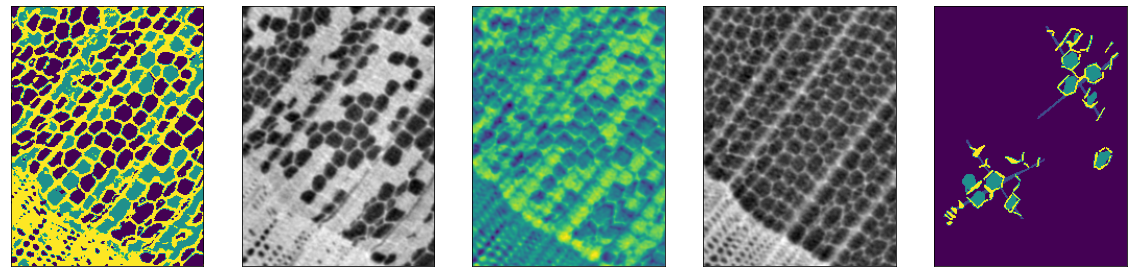

In [705]:
fig, axes = plt.subplots(1,5, figsize=(20,10))
axes[0].imshow(TS.current_result)
axes[1].imshow(TS.current_im8, 'gray')
axes[2].imshow(TS.current_diff_im)
# axes[3].imshow(m8old, 'gray')
axes[3].imshow(TS.current_first_im, 'gray')
axes[4].imshow(TS.current_truth)

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

In [702]:
label_set = canvas.get_image_data()

TS.current_truth[label_set[:,:,0]>0] = 1
TS.current_truth[label_set[:,:,1]>0] = 2
TS.current_truth[label_set[:,:,2]>0] = 4

imageio.imsave(TS.current_truthpath, TS.current_truth)

In [703]:
TS.train_slice()

training and classifying


In [704]:
# TS.current_im8 = tfs.adjust_image_contrast(TS.current_im8, 50,200)

### when done, maybe save the classifier

In [706]:
TS.pickle_classifier()

### use an existing trainingset to train classifier (adhere to label iamge naming convention)

In [24]:
# TS.feat_data = TS.feat_data.compute() #better option for retraining, but creates a numpy array, maybe you can avoid

In [22]:
# provide new feature data if necessary and say if it is a lazy dask array or not
# TS.feat_data = 
# TS.lazy = 

TS.train()

In [26]:
# TS.pickle_classifier()

In [27]:
from segmentation import segmentation
# import pickle

In [24]:
SM = segmentation(training_path = training_path, classifier_path=os.path.join(training_path, 'classifier.p'))

In [28]:
# SM.import_classifier(TS.clf)
# SM.clf = pickle.load(open(os.path.join(training_path, 'classifier.p'), 'rb'))

In [29]:
SM.import_feature_data(IF.result)

In [39]:
# SM.lazy = False
part2 = SM.feat_data.feature_stack[:,:,:,25:,:]

In [40]:
num_feat = part2.shape[-1]
clf = SM.clf
seg2 = clf.predict(part2.data.reshape(-1,num_feat))
seg2 = seg2.reshape(part2[...,0].shape).astype(np.uint8)

In [38]:
# seg1 = seg1.reshape(part1[...,0].shape).astype(np.uint8)

In [ ]:
# SM.classify_all()

classifying ...


In [707]:
# SM.store_segmented_data()

In [49]:
seg_data.size/1024**3

0.2153683453798294

In [47]:
path = os.path.join(SM.training_path, 'segmented.nc')

#TODO: propagate labels from raw data
#TODO: if self.segmented_data is a dask array, rechunk for saving
shp = seg_data.shape
data = xr.Dataset({'segmented': (['x','y','z','time'], seg_data)},
                               coords = {'x': np.arange(shp[0]),
                               'y': np.arange(shp[1]),
                               'z': np.arange(shp[2]),
                               'time': np.arange(shp[3]),
                               'feature': SM.feature_names}
                     )
# data.to

In [50]:
data.to_netcdf(path)

In [54]:
test = xr.load_dataset(path)

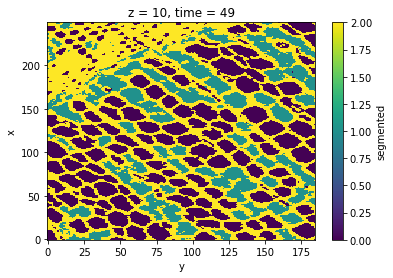

2022-08-24 15:53:00,051 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,057 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,066 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,070 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,074 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,076 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,080 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,084 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,084 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,084 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,093 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-08-24 15:53:00,101 - distributed.nanny

In [62]:
test.segmented.sel(z=10, time=49).plot()

/tmp/ipykernel_835997/3278944968.py:2: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(TS.feature_names, TS.clf.feature_importances_,'x')


Text(0, 0.5, 'importance')

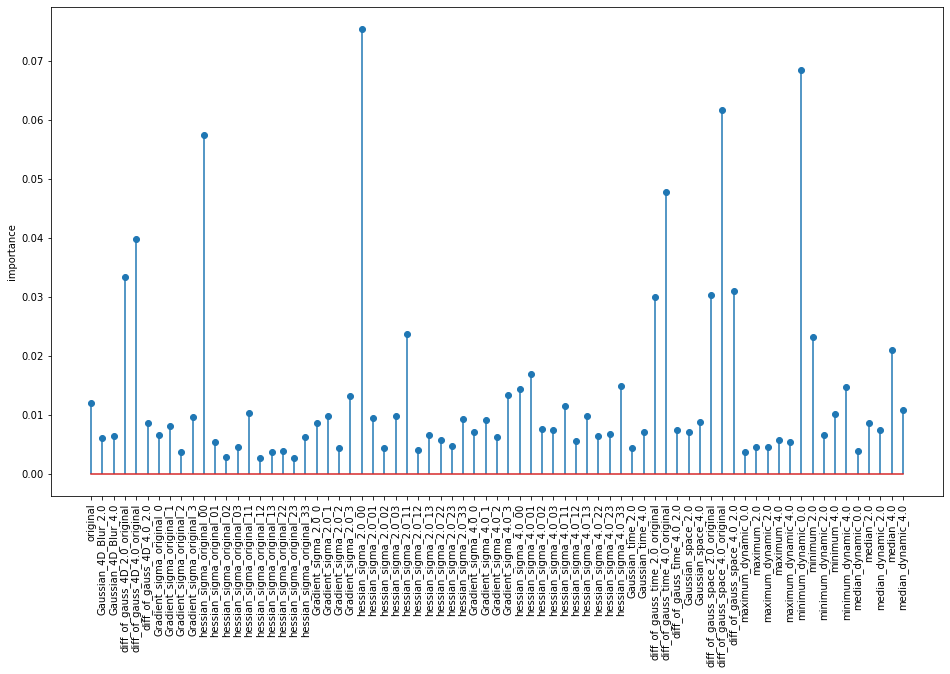

In [632]:
plt.figure(figsize=(16,9))
plt.stem(TS.feature_names, TS.clf.feature_importances_,'x')
plt.xticks(rotation=90)
plt.ylabel('importance') 

/tmp/ipykernel_870706/1913450262.py:2: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(SM.feature_names, clf.feature_importances_,'x')


Text(0, 0.5, 'importance')

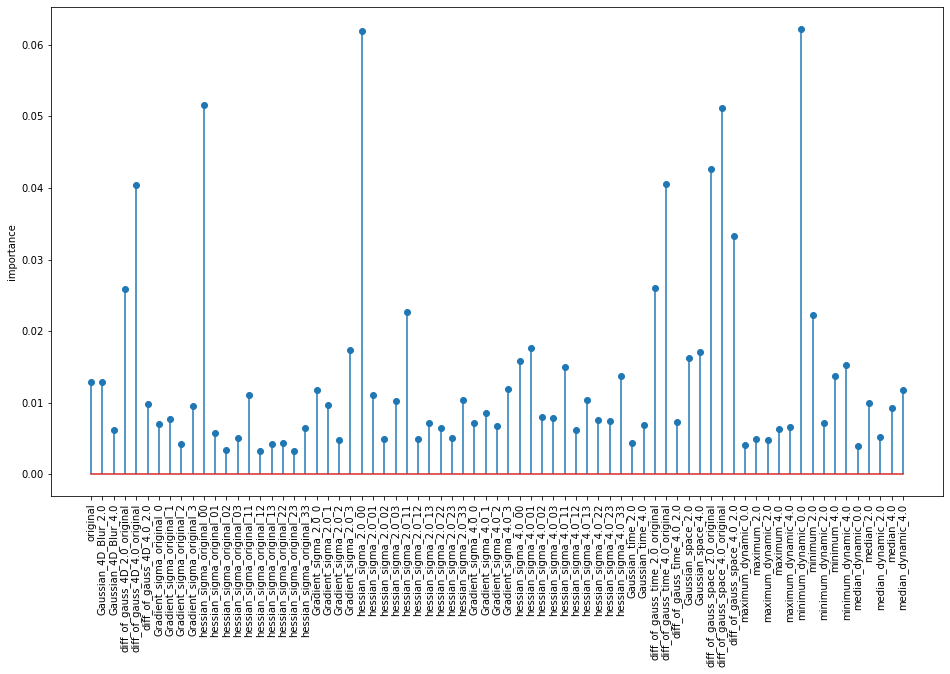

In [52]:
plt.figure(figsize=(16,9))
plt.stem(SM.feature_names, clf.feature_importances_,'x')
plt.xticks(rotation=90)
plt.ylabel('importance') 

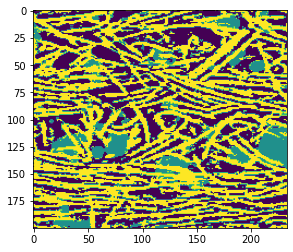

In [49]:
plt.imshow(SM.segmented_data[:,10,:,-1])